# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw['munResLat'].astype(float)

0       -11.93554
1       -11.93554
2       -11.93554
3       -12.13178
4       -11.93554
           ...   
27023   -12.74137
27024   -12.55684
27025   -12.74137
27026   -12.74137
27027   -11.70974
Name: munResLat, Length: 27028, dtype: float64

In [37]:
sinasc2 = sinasc_raw.copy()

In [13]:
#sinasc_raw['munResArea']

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc2['acimaMenos10.5'] = sinasc_raw['munResLat'] > -10.5
sinasc2['abaixoMenos10.5'] = sinasc_raw['munResLat'] <= -10.5

resultado = sinasc2.groupby(['abaixoMenos10.5','acimaMenos10.5']).agg({'SEMAGESTAC': ['mean', 'sum', 'max', 'min', 'std', 'var'],
                                                                       'PESO': ['mean', 'sum', 'max', 'min', 'std', 'var']
                                                                       }).reset_index().dropna()
resultado.set_index(['abaixoMenos10.5', 'acimaMenos10.5'], inplace=True)
resultado

SEMAGESTAC                                  \
                                     mean       sum   max   min       std   
abaixoMenos10.5 acimaMenos10.5                                              
False           True            38.588302  511951.0  45.0  21.0  2.020722   
True            False           38.545360  482665.0  45.0  19.0  2.012435   

                                                 PESO                       \
                                     var         mean       sum   max  min   
abaixoMenos10.5 acimaMenos10.5                                               
False           True            4.083319  3246.055864  45555148  5190  295   
True            False           4.049895  3240.098053  42098594  5985  258   

                                                           
                                       std            var  
abaixoMenos10.5 acimaMenos10.5                             
False           True            556.487709  309678.570242  
True            False           531.815114  282827.315354

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc2['munAcima3000'] = sinasc_raw['munResArea'] > 3000

sinasc2['munCategory'] = sinasc2['munAcima3000'].map({True: '1 - Acima de 3000', False: '2 - Abaixo de 3000'})

resultado = sinasc2.groupby('munCategory').agg({'APGAR5': ['mean', 'sum', 'max', 'min', 'std', 'var'],
                                                'IDADEMAE': ['mean', 'sum', 'max', 'min', 'std', 'var']}).reset_index().dropna()


resultado.set_index('munCategory', inplace=True)
resultado

APGAR5                                           \
                        mean       sum   max  min       std       var   
munCategory                                                             
1 - Acima de 3000   9.190836  199579.0  10.0  0.0  0.787591  0.620299   
2 - Abaixo de 3000  9.130518   47570.0  10.0  0.0  0.801138  0.641821   

                     IDADEMAE                                       
                         mean     sum max min       std        var  
munCategory                                                         
1 - Acima de 3000   26.038518  567848  53  12  6.405497  41.030387  
2 - Abaixo de 3000  26.324330  137413  53  11  6.305013  39.753192

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [57]:
sinasc2 = sinasc_raw.copy()
sinasc2['munResAltAcima153'] = sinasc2['munResAlt'] > 153.0

resultado = sinasc2.groupby(['munResAltAcima153']).agg({'QTDFILVIVO': ['mean', 'sum', 'max', 'min', 'std', 'var'],
                                                        'QTDFILMORT': ['mean', 'sum', 'max', 'min', 'std', 'var']}).reset_index().dropna()

resultado

munResAltAcima153 QTDFILVIVO                       QTDFILMORT               \
                          mean   sum max min std var       mean  sum max min   
0             False          1 14407  14   0   1   2          0 3521   9   0   
1              True          1 12420  30   0   1   1          0 3123  28   0   

           
  std var  
0   1   0  
1   1   0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [41]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [42]:
sinasc3 = sinasc_raw[['munResNome', 'IDADEMAE','DTNASC']].dropna()
sinasc3['regioesImediatas'] = sinasc3['munResNome'].map(imediatas)
sinasc3['DTNASC'] = pd.to_datetime(sinasc3['DTNASC'], errors='coerce', format='%Y-%m-%d')
sinasc3['MesAno'] = sinasc3['DTNASC'].dt.to_period('M')


pivot_table = sinasc3.pivot_table(index='regioesImediatas',
                                  columns='MesAno',
                                  values='IDADEMAE',
                                  aggfunc='mean')

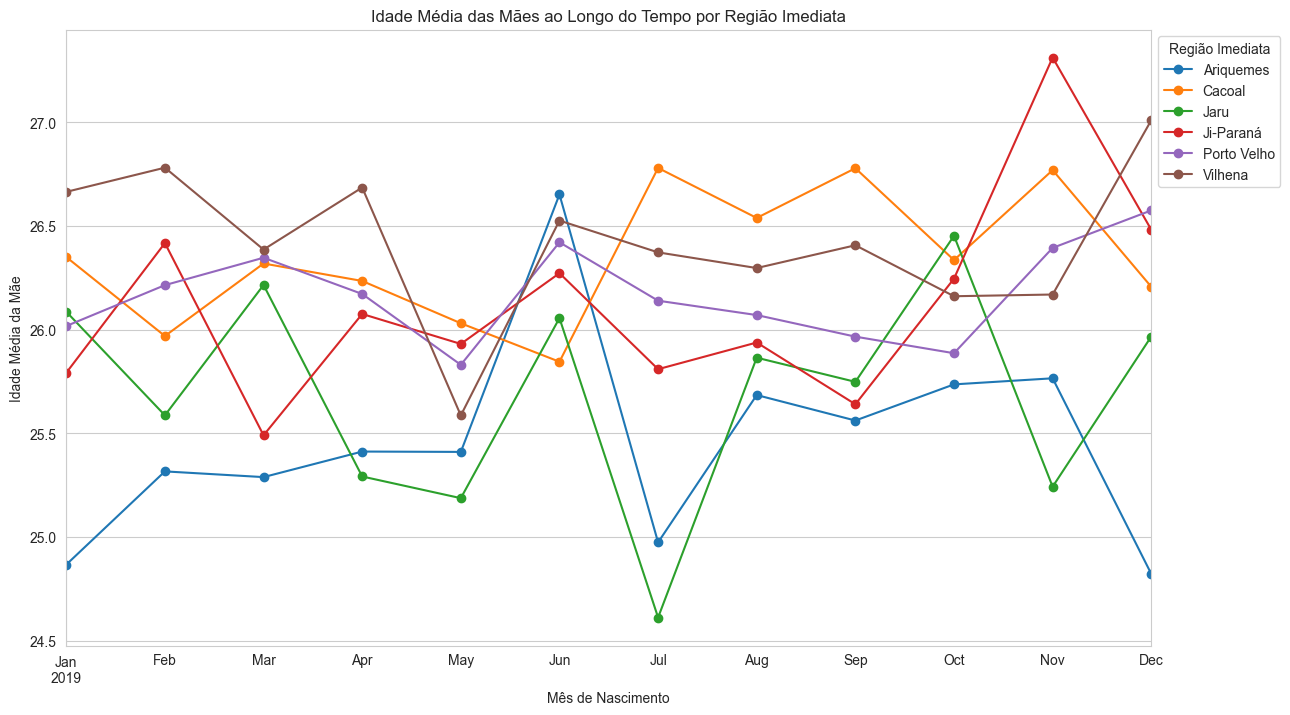

In [56]:
pivot_table.T.plot(kind='line', figsize=(14, 8), marker='o', linestyle='-')
plt.xlabel('Mês de Nascimento')
plt.ylabel('Idade Média da Mãe')
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata')
plt.legend(title='Região Imediata', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [44]:
IDH = {
    "Porto Velho": 0.736,
    "Vilhena": 0.731,
    "Cacoal": 0.718,
    "Ji-Paraná": 0.714,
    "Pimenta Bueno": 0.710,
    "Ariquemes": 0.702,
    "Rolim de Moura": 0.700,
    "Cerejeiras": 0.692,
    "Jaru": 0.689,
    "Colorado do Oeste": 0.685,
    "Ouro Preto do Oeste": 0.682,
    "Espigão d'Oeste": 0.672,
    "Santa Luzia d'Oeste": 0.670,
    "Pimenteiras do Oeste": 0.665,
    "Presidente Médici": 0.664,
    "Castanheiras": 0.658,
    "Guajará-Mirim": 0.657,
    "Chupinguaia": 0.652,
    "Cabixi": 0.650,
    "Candeias do Jamari": 0.649,
    "São Felipe d'Oeste": 0.649,
    "Cacaulândia": 0.646,
    "São Miguel do Guaporé": 0.646,
    "Mirante da Serra": 0.643,
    "Alvorada d'Oeste": 0.643,
    "Teixeirópolis": 0.643,
    "Nova Brasilândia d'Oeste": 0.643,
    "Rio Crespo": 0.643,
    "Primavera de Rondônia": 0.641,
    "Alta Floresta d'Oeste": 0.641,
    "Ministro Andreazza": 0.638,
    "Novo Horizonte do Oeste": 0.634,
    "Vale do Paraíso": 0.627,
    "Alto Paraíso": 0.625,
    "Parecis": 0.617,
    "Buritis": 0.616,
    "Itapuã do Oeste": 0.614,
    "Corumbiara": 0.613,
    "Cujubim": 0.612,
    "Costa Marques": 0.611,
    "São Francisco do Guaporé": 0.611,
    "Urupá": 0.609,
    "Monte Negro": 0.607,
    "Seringueiras": 0.598,
    "Governador Jorge Teixeira": 0.596,
    "Machadinho d'Oeste": 0.596,
    "Campo Novo de Rondônia": 0.593,
    "Alto Alegre dos Parecis": 0.592,
    "Theobroma": 0.589,
    "Nova União": 0.587,
    "Nova Mamoré": 0.587,
    "Vale do Anari": 0.584
}

In [45]:
sinasc4 = sinasc_raw[['munResNome', 'IDADEMAE','DTNASC']].dropna()
sinasc4['IDH'] = sinasc4['munResNome'].map(IDH)
sinasc4['regioesImediatas'] = sinasc4['munResNome'].map(imediatas)
sinasc4 = sinasc4.dropna()

resultado = sinasc4.groupby('regioesImediatas').agg({
                                                    'IDH': ['mean', 'min', 'max'],
                                                    'DTNASC': 'sum',
                                                    'IDADEMAE': 'mean'})
resultado

IDH                \
                      mean    min    max   
regioesImediatas                           
Ariquemes         0.661747  0.593  0.702   
Cacoal            0.698532  0.592  0.718   
Jaru              0.663741  0.584  0.689   
Ji-Paraná         0.674398  0.587  0.714   
Porto Velho       0.719292  0.587  0.736   
Vilhena           0.708147  0.613  0.731   

                                                             DTNASC   IDADEMAE  
                                                                sum       mean  
regioesImediatas                                                                
Ariquemes         2019-01-162019-01-242019-01-022019-01-072019-0...  25.459635  
Cacoal            2019-03-202019-04-012019-04-052019-04-082019-0...  26.434757  
Jaru              2019-01-172019-01-222019-01-142019-01-212019-0...  25.805579  
Ji-Paraná         2019-01-162019-01-292019-01-082019-02-132019-0...  26.108682  
Porto Velho       2019-01-112019-01-152019-01-302019-01-082019-0...  26.166303  
Vilhena           2019-01-052019-02-042019-03-202019-06-132019-0...  26.417143

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [46]:
ifdm = {
    "Ariquemes": 0.7746,
    "Vilhena": 0.7465,
    "Pimenta Bueno": 0.7383,
    "Porto Velho": 0.7257,
    "Ji-Paraná": 0.7117,
    "Cacoal": 0.7111,
    "Santa Luzia d'Oeste": 0.6850,
    "Rolim de Moura": 0.6785,
    "Chupinguaia": 0.6766,
    "São Miguel do Guaporé": 0.6699,
    "Pimenteiras do Oeste": 0.6501,
    "Teixeirópolis": 0.6500,
    "Colorado do Oeste": 0.6473,
    "Jaru": 0.6450,
    "Rio Crespo": 0.6430,
    "Primavera de Rondônia": 0.6384,
    "Alta Floresta d'Oeste": 0.6337,
    "Ouro Preto do Oeste": 0.6261,
    "São Francisco do Guaporé": 0.6214,
    "Candeias do Jamari": 0.6199,
    "Buritis": 0.6153,
    "São Felipe d'Oeste": 0.6153,
    "Presidente Médici": 0.6140,
    "Cerejeiras": 0.6137,
    "Monte Negro": 0.6016,
    "Urupá": 0.6006,
    "Espigão d'Oeste": 0.5973,
    "Seringueiras": 0.5922,
    "Alvorada d'Oeste": 0.5919,
    "Itapuã do Oeste": 0.5903,
    "Cabixi": 0.5887,
    "Novo Horizonte do Oeste": 0.5858,
    "Nova Brasilândia d'Oeste": 0.5857,
    "Vale do Paraíso": 0.5818,
    "Corumbiara": 0.5759,
    "Alto Paraíso": 0.5735,
    "Cacaulândia": 0.5721,
    "Vale do Anari": 0.5710,
    "Ministro Andreazza": 0.5657,
    "Costa Marques": 0.5626,
    "Nova União": 0.5571,
    "Guajará-Mirim": 0.5541,
    "Mirante da Serra": 0.5519,
    "Parecis": 0.5502,
    "Castanheiras": 0.5430,
    "Theobroma": 0.5405,
    "Machadinho d'Oeste": 0.5322,
    "Campo Novo de Rondônia": 0.5272,
    "Nova Mamoré": 0.5084,
    "Cujubim": 0.5055,
    "Alto Alegre dos Parecis": 0.5046,
    "Governador Jorge Teixeira": 0.4562,
}

In [54]:
sinasc5 = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC', 'APGAR5']]
sinasc5['IFDM'] = sinasc5['munResNome'].map(ifdm)
sinasc5['regioesImediatas'] = sinasc5['munResNome'].dropna().map(imediatas)
sinasc5['IDH'] = sinasc4['IDH']

resultado = sinasc5.pivot_table(index='regioesImediatas',
                                values='IFDM',
                                aggfunc='mean')

resultado

,IFDM
regioesImediatas,
Ariquemes,1
Cacoal,1
Jaru,1
Ji-Paraná,1
Porto Velho,1
Vilhena,1


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [48]:
pib = {
    "Porto Velho": 17912070,
    "Ji-Paraná": 3783972,
    "Vilhena": 2831175,
    "Ariquemes": 2579830,
    "Cacoal": 2261644,
    "Jaru": 1500890,
    "Rolim de Moura": 1283434,
    "Pimenta Bueno": 1164877,
    "Guajará-Mirim": 893000,
    "Ouro Preto do Oeste": 834000,
    "Buritis": 726000,
    "Machadinho do Oeste": 633000,
    "Espigão d'Oeste": 625000,
    "São Miguel do Guaporé": 616000,
    "Candeias do Jamari": 548000,
    "Nova Mamoré": 529000,
    "Cerejeiras": 507000,
    "Alta Floresta do Oeste": 496000,
    "Presidente Médici": 428000,
    "Cujubim": 385000,
    "Nova Brasilândia do Oeste": 360000,
    "Alto Paraíso": 358000,
    "São Francisco do Guaporé": 353000,
    "Colorado do Oeste": 335000,
    "Monte Negro": 219152,
    "Alto Alegre dos Parecis": 213410,
    "Campo Novo de Rondônia": 208821,
    "Alvorada do Oeste": 204098,
    "Chupinguaia": 190331,
    "Corumbiara": 188218,
    "Ministro Andreazza": 174633,
    "Urupá": 172143,
    "Costa Marques": 171878,
    "Seringueiras": 169429,
    "Mirante da Serra": 163955,
    "Governador Jorge Teixeira": 148027,
    "Theobroma": 140601,
    "Santa Luzia do Oeste": 135934,
    "Novo Horizonte do Oeste": 129399,
    "Itapuã do Oeste": 129351,
    "Vale do Paraíso": 116742,
    "Cacaulândia": 116635,
    "Cabixi": 113031,
    "Vale do Anari": 105208,
    "Nova União": 92346,
    "Parecis": 80759,
    "Rio Crespo": 76854,
    "Pimenteiras do Oeste": 76756,
    "Teixeirópolis": 72089,
    "São Felipe do Oeste": 72084,
    "Castanheiras": 59779,
    "Primavera de Rondônia": 52908,
}

In [49]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [55]:
sinasc6 = sinasc_raw[['munResNome','DTNASC','APGAR5','QTDFILVIVO','QTDFILMORT']]
sinasc6['PIB'] = sinasc6['munResNome'].map(pib)
sinasc6['regioesImediatas'] = sinasc6['munResNome'].map(imediatas)
sinasc6 = sinasc6.dropna()

resultado = sinasc6.groupby('regioesImediatas').agg({'PIB':'mean', 'QTDFILVIVO':'sum','QTDFILMORT':'sum'})
resultado


,PIB,QTDFILVIVO,QTDFILMORT
regioesImediatas,,,
Ariquemes,1752413,2824,741
Cacoal,1511080,2967,801
Jaru,1155223,1055,260
Ji-Paraná,1980535,4417,1122
Porto Velho,14840726,10149,2597
Vilhena,1945599,2257,604


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Quanto maior o PIB, maior a quantidade de filhos vivos, mas a quantidade de filhos mortos não é muito afetado